# 임대료 및 공실률 시각화

1. 임대료     
2. 공실률      
3. 소득수익률   

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
rent = pd.read_csv('rent.csv')

In [48]:
rent = rent.drop(['Unnamed: 0', '수익률 정보', '수익률 정보.2'], axis=1)

In [49]:
rent.rename(columns = {'수익률 정보.1':'소득수익률'}, inplace = True)

In [50]:
rent

,광역상권,하위상권,임대료,공실률,소득수익률,연도,분기
0,서울,서울,57.9,7.5,0.92,2019,1
1,도심지역,소계,99.9,7.0,1.01,2019,1
2,도심지역,광화문,87.2,10.0,1.10,2019,1
3,도심지역,동대문,36.6,10.6,0.88,2019,1
4,도심지역,명동,295.1,8.8,0.94,2019,1
...,...,...,...,...,...,...,...
395,기타지역,장안동,32.7,11.0,0.66,2020,4
396,기타지역,천호,43.8,5.7,0.82,2020,4
397,기타지역,청량리,46.7,4.6,0.84,2020,4
398,기타지역,혜화동,66.8,14.6,0.63,2020,4


In [51]:
rent['광역상권'].value_counts()

기타지역       196
강남지역        76
도심지역        72
영등포신촌지역     48
서울           8
Name: 광역상권, dtype: int64

In [52]:
rent.describe()

,임대료,공실률,소득수익률,연도,분기
count,400.000000,400.000000,400.00000,400.000000,400.000000
mean,56.967250,8.033000,0.77855,2019.550000,2.500000
std,38.518443,4.585737,0.17564,0.498117,1.119434
min,24.200000,1.100000,0.28000,2019.000000,1.000000
25%,38.650000,4.800000,0.65000,2019.000000,1.750000
50%,47.300000,7.350000,0.79000,2020.000000,2.500000
75%,64.225000,10.100000,0.90000,2020.000000,3.250000
max,296.700000,29.600000,1.16000,2020.000000,4.000000


## 1. 임대료

### (1) 도심지역

In [53]:
dosim = rent[rent['광역상권']=='도심지역']
dosim = dosim.groupby(['하위상권','연도','분기']).sum().reset_index()
dosim

,하위상권,연도,분기,임대료,공실률,소득수익률
0,광화문,2019,1,87.2,10.0,1.10
1,광화문,2019,2,87.2,12.6,1.07
2,광화문,2019,3,87.2,5.8,0.91
3,광화문,2019,4,87.2,3.7,1.16
4,광화문,2020,1,81.7,2.3,1.06
...,...,...,...,...,...,...
67,충무로,2019,4,43.3,5.0,0.76
68,충무로,2020,1,45.9,7.2,0.73
69,충무로,2020,2,45.5,7.2,0.71
70,충무로,2020,3,45.5,7.2,0.50


In [54]:
#그래프에서 마이너스 부호 보여주기 위한 글꼴 설정
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False

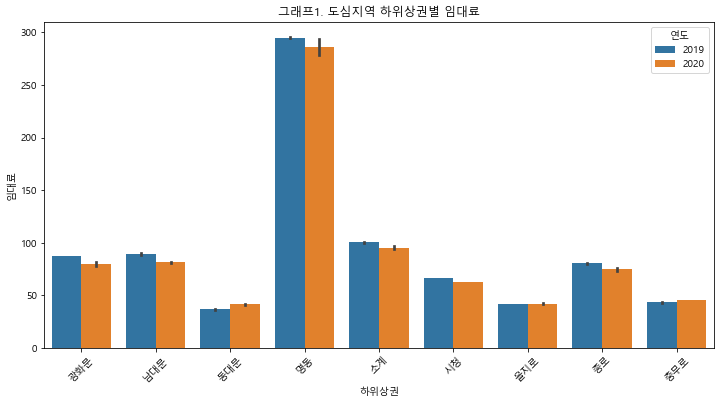

In [55]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='하위상권', y='임대료', hue='연도', data=dosim)
plt.xticks(rotation=45)
plt.title('그래프1. 도심지역 하위상권별 임대료')

plt.show()

#그래프 해석
#명동이 가장 높다.
#동대문과 충무로를 제외하고, 모든 지역의 임대료는 하락했다.

In [56]:
dosim[dosim['하위상권']=='명동']

,하위상권,연도,분기,임대료,공실률,소득수익률
24,명동,2019,1,295.1,8.8,0.94
25,명동,2019,2,294.6,7.8,0.98
26,명동,2019,3,294.6,8.9,0.44
27,명동,2019,4,294.6,8.9,0.95
28,명동,2020,1,296.7,7.4,0.91
29,명동,2020,2,290.7,8.4,0.89
30,명동,2020,3,285.8,9.8,0.57
31,명동,2020,4,271.7,22.3,0.60


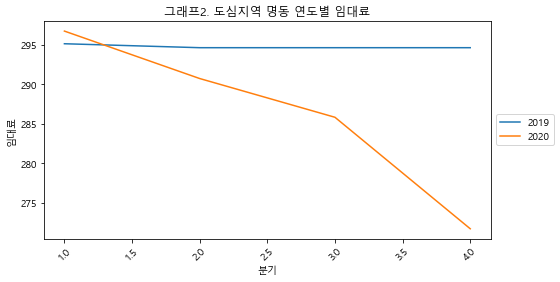

In [57]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='분기', y='임대료',hue='연도', data=dosim[dosim['하위상권']=='명동'],
                palette=["C0", "C1"])
plt.xticks(rotation=45)
plt.title('그래프2. 도심지역 명동 연도별 임대료')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#2019년 명동 임대료는 거의 변화가 없었다.
#2020년 명도 임대료는 급격하게 하락했다. 코로나로 인해, 상권이 감소한 것으로 판단된다.

### (2)  강남지역

In [58]:
gangnam = rent[rent['광역상권']=='강남지역']
gangnam = gangnam.groupby(['하위상권','연도','분기']).sum().reset_index()
gangnam

,하위상권,연도,분기,임대료,공실률,소득수익률
0,강남대로,2019,1,125.3,3.8,1.07
1,강남대로,2019,2,125.4,3.7,1.05
2,강남대로,2019,3,125.4,3.7,0.87
3,강남대로,2019,4,124.2,4.0,1.01
4,강남대로,2020,1,102.6,7.4,0.83
...,...,...,...,...,...,...
71,테헤란로,2019,4,47.7,14.1,0.77
72,테헤란로,2020,1,54.8,14.8,0.76
73,테헤란로,2020,2,54.7,12.6,0.75
74,테헤란로,2020,3,54.5,13.1,0.59


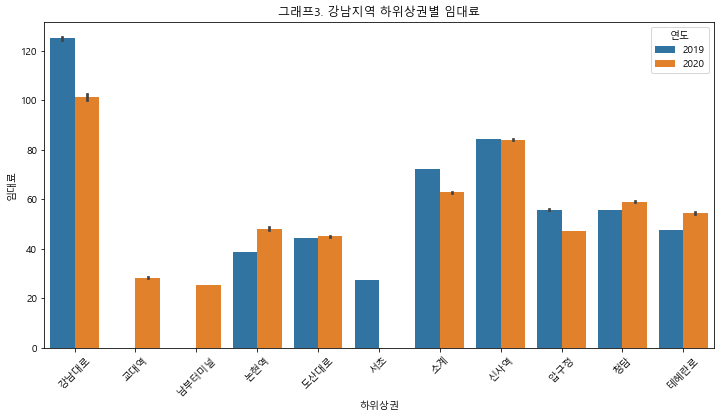

In [59]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='하위상권', y='임대료', hue='연도', data=gangnam)
plt.xticks(rotation=45)
plt.title('그래프3. 강남지역 하위상권별 임대료')

plt.show()

#그래프 해석
#강남대로가 가장 높다. 하지만 연도흐름에 따라 감소가 매우 크다.

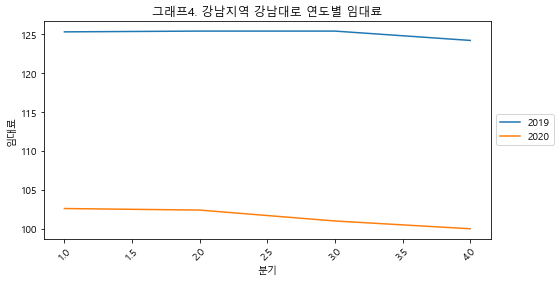

In [60]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='분기', y='임대료',hue='연도', data=gangnam[gangnam['하위상권']=='강남대로'],
                palette=["C0", "C1"])
plt.xticks(rotation=45)
plt.title('그래프4. 강남지역 강남대로 연도별 임대료')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#강남대로 임대료는 2019년과 2020년 차이가 크다.
#약간 감소하는 추세이다.

### (3)  영등포신촌지역

In [61]:
young = rent[rent['광역상권']=='영등포신촌지역']
young = young.groupby(['하위상권','연도','분기']).sum().reset_index()
young

,하위상권,연도,분기,임대료,공실률,소득수익률
0,공덕역,2019,1,44.7,6.7,0.85
1,공덕역,2019,2,44.7,6.7,0.85
2,공덕역,2019,3,44.7,6.7,0.72
3,공덕역,2019,4,44.7,6.7,0.79
4,공덕역,2020,1,36.9,5.2,0.87
5,공덕역,2020,2,36.9,5.2,0.86
6,공덕역,2020,3,36.8,5.2,0.62
7,공덕역,2020,4,36.6,5.2,0.84
8,당산역,2020,1,29.4,3.5,0.89
9,당산역,2020,2,29.4,3.5,0.88


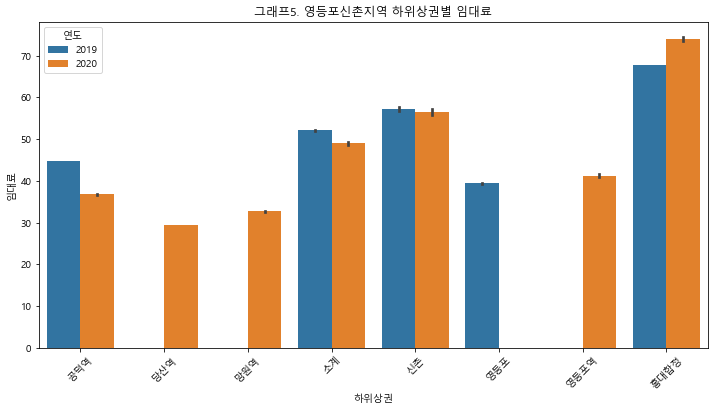

In [62]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='하위상권', y='임대료', hue='연도', data=young)
plt.xticks(rotation=45)
plt.title('그래프5. 영등포신촌지역 하위상권별 임대료')

plt.show()

#그래프 해석
#홍대합정이 가장 높다. 연도 흐름에 따라 증가하는 추세이다.

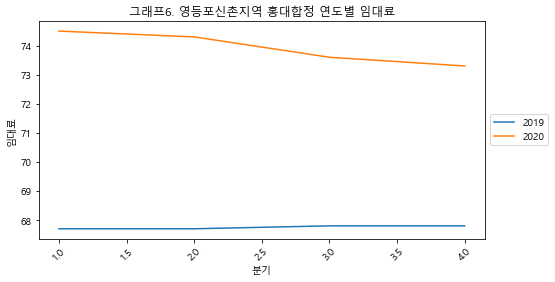

In [63]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='분기', y='임대료',hue='연도', data=young[young['하위상권']=='홍대합정'],
                palette=["C0", "C1"])
plt.xticks(rotation=45)
plt.title('그래프6. 영등포신촌지역 홍대합정 연도별 임대료')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#홍대합정 2019년과 2020년 차이가 커보이지만, 사실 수치상으로는 약 7정도밖에 차이가 나지 않는다.
#2019년에는 다소 상승했지만 2020년에는 하락했다.

### (4)  기타지역

In [64]:
etc = rent[rent['광역상권']=='기타지역']
etc = etc.groupby(['하위상권','연도','분기']).sum().reset_index()
etc

,하위상권,연도,분기,임대료,공실률,소득수익률
0,가락시장,2020,1,38.2,6.4,0.64
1,가락시장,2020,2,38.2,6.4,0.62
2,가락시장,2020,3,38.2,5.8,0.41
3,가락시장,2020,4,38.2,9.9,0.56
4,건대입구,2019,1,64.2,6.1,0.93
...,...,...,...,...,...,...
191,화곡,2019,4,32.5,13.8,0.78
192,화곡,2020,1,34.6,6.7,1.00
193,화곡,2020,2,34.6,7.1,0.98
194,화곡,2020,3,34.5,12.9,0.59


In [65]:
etc[92:]

,하위상권,연도,분기,임대료,공실률,소득수익률
92,수유,2019,1,58.0,2.1,1.16
93,수유,2019,2,58.0,3.0,1.16
94,수유,2019,3,58.0,2.9,0.83
95,수유,2019,4,59.4,2.3,1.13
96,수유,2020,1,50.8,1.8,1.00
...,...,...,...,...,...,...
191,화곡,2019,4,32.5,13.8,0.78
192,화곡,2020,1,34.6,6.7,1.00
193,화곡,2020,2,34.6,7.1,0.98
194,화곡,2020,3,34.5,12.9,0.59


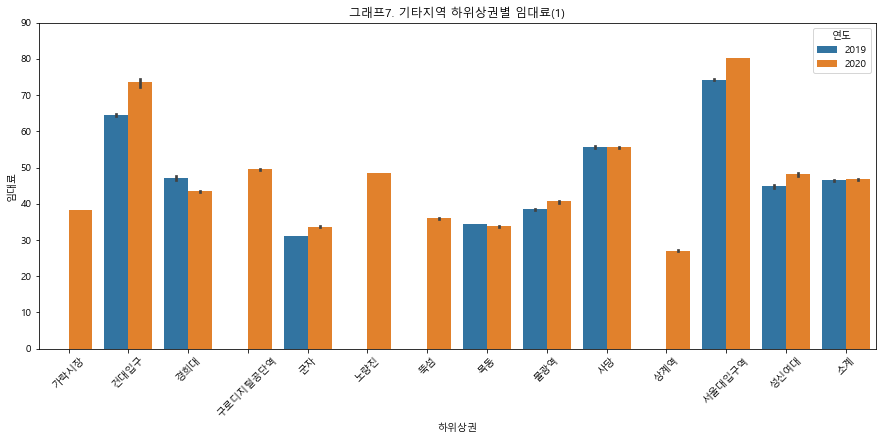

In [66]:
plt.figure(figsize=(15, 6))
g = sns.barplot(x='하위상권', y='임대료', hue='연도', data=etc[:92])
plt.xticks(rotation=45)
plt.title('그래프7. 기타지역 하위상권별 임대료(1)')
plt.ylim(0,90)
plt.show()

#그래프 해석
#서울대입구역, 건대입구역이 높다. 두 곳모두 증가하는 추세이다.

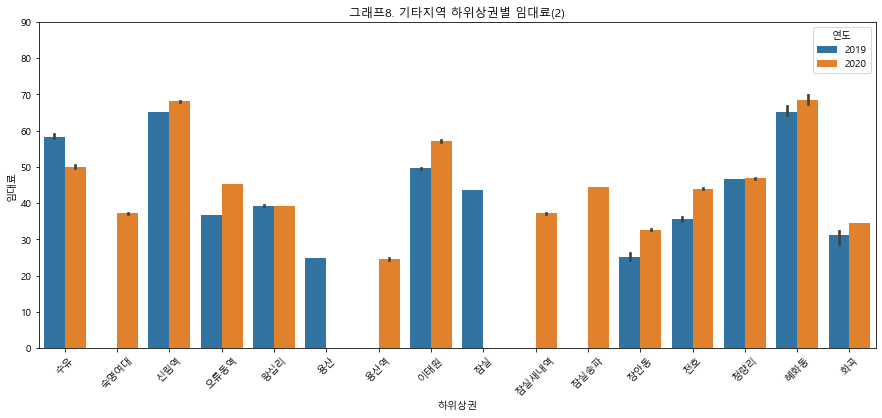

In [67]:
plt.figure(figsize=(15, 6))
g = sns.barplot(x='하위상권', y='임대료', hue='연도', data=etc[92:])
plt.xticks(rotation=45)
plt.title('그래프8. 기타지역 하위상권별 임대료(2)')

plt.ylim(0,90)
plt.show()

#그래프 해석
#이 그래프에서 신림역, 혜화동이 높지만 앞의 서울대,건대보다는 낮은 수치이다.
#신림역, 혜화동도 증가하고 있다.

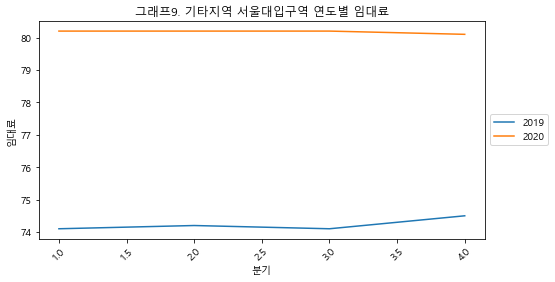

In [68]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='분기', y='임대료',hue='연도', data=etc[etc['하위상권']=='서울대입구역'],
                palette=["C0", "C1"])
plt.xticks(rotation=45)
plt.title('그래프9. 기타지역 서울대입구역 연도별 임대료')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#홍대합정 2019년과 2020년 차이가 커보이지만, 사실 수치상으로는 약 6정도밖에 차이가 나지 않는다.
#2019년에는 다소 상승했지만 2020년에는 아주 작게 하락했다.

## 2. 공실률

### (1) 도심지역

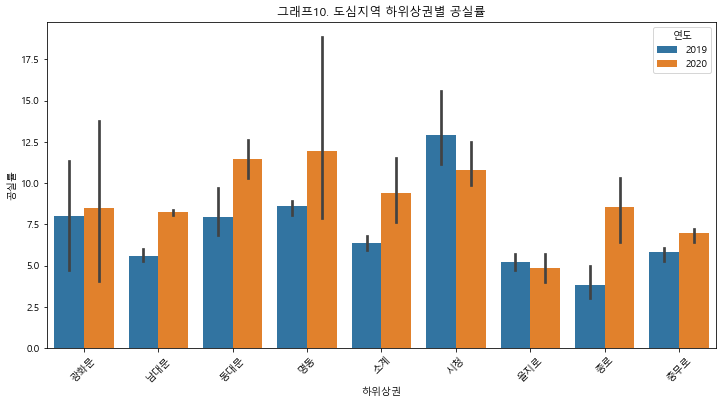

In [69]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='하위상권', y='공실률', hue='연도', data=dosim)
plt.xticks(rotation=45)
plt.title('그래프10. 도심지역 하위상권별 공실률')

plt.show()

#그래프 결과
#명동이 가장 높다.
#2019년에는 시청이 가장 높았고, 2020년에는 명동이 가장 높았다.
#2020년 명동 공실률은 22.3까지도 치솟았다.

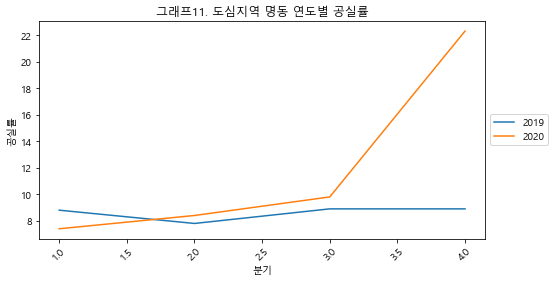

In [70]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='분기', y='공실률',hue='연도', data=dosim[dosim['하위상권']=='명동'],
                palette=["C0", "C1"])
plt.xticks(rotation=45)
plt.title('그래프11. 도심지역 명동 연도별 공실률')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#명동 2020년 공실률이 급격하게 증가한 것이 보인다.

### (2)  강남지역

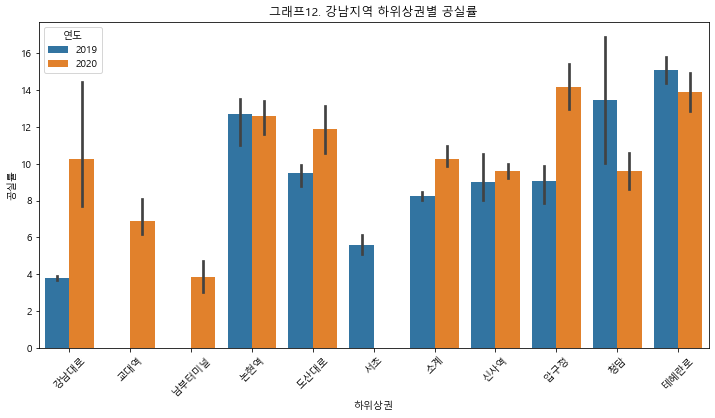

In [71]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='하위상권', y='공실률', hue='연도', data=gangnam)
plt.xticks(rotation=45)
plt.title('그래프12. 강남지역 하위상권별 공실률')

plt.show()
#2019년에는 테헤란로가 가장 높았고, 2020년에는 압구정이 가장 높았다.

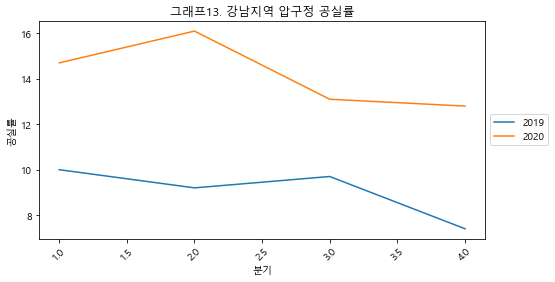

In [72]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='분기', y='공실률',hue='연도', data=gangnam[gangnam['하위상권']=='압구정'],
                palette=["C0", "C1"])
plt.xticks(rotation=45)
plt.title('그래프13. 강남지역 압구정 공실률')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#압구정 공실률은 오락가락하는 편이다.
#2020년 2분기부터는 감소하는 편이지만, 수치를 보면 매우 작다.

### (3)  영등포신촌지역

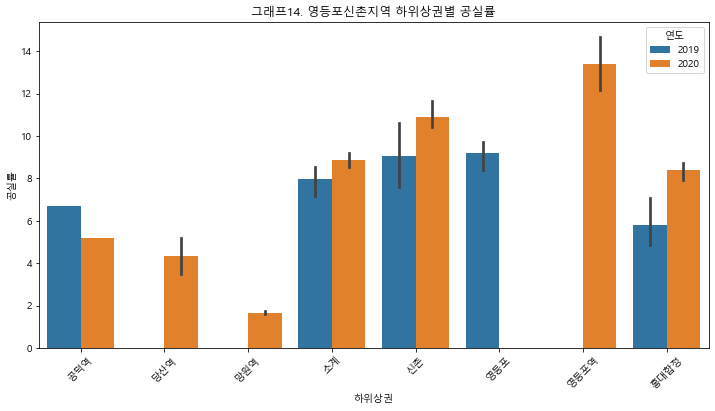

In [73]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='하위상권', y='공실률', hue='연도', data=young)
plt.xticks(rotation=45)
plt.title('그래프14. 영등포신촌지역 하위상권별 공실률')

plt.show()

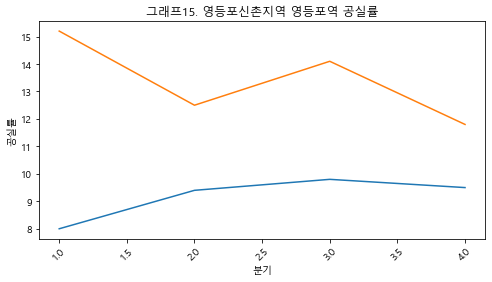

In [74]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='분기', y='공실률', data=young[young['하위상권']=='영등포'],
                palette=["C0", "C1"])
g = sns.lineplot(x='분기', y='공실률', data=young[young['하위상권']=='영등포역'],
                palette=["C0", "C1"])
plt.xticks(rotation=45)
plt.title('그래프15. 영등포신촌지역 영등포역 공실률')
plt.show()

#그래프 해석
#영등포 2019년 공실률은 약간 증가하다 감소했다.
#2020년 공실률은 증가와 감소를 반복한다.

### (4)  기타지역

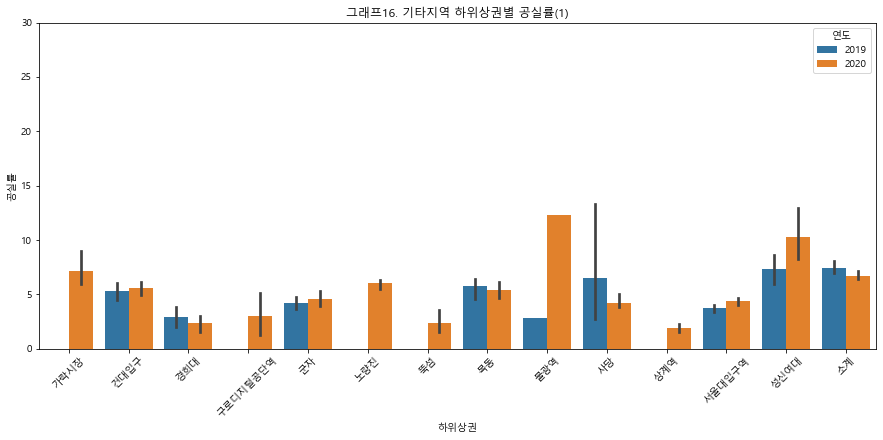

In [75]:
plt.figure(figsize=(15, 6))
g = sns.barplot(x='하위상권', y='공실률', hue='연도', data=etc[:92])
plt.xticks(rotation=45)
plt.title('그래프16. 기타지역 하위상권별 공실률(1)')
plt.ylim(0,30)
plt.show()

#그래프 해석
#2019년 불광역 공실률이 눈에 띈다. 하지만 수치상으로는 매우 낮다.

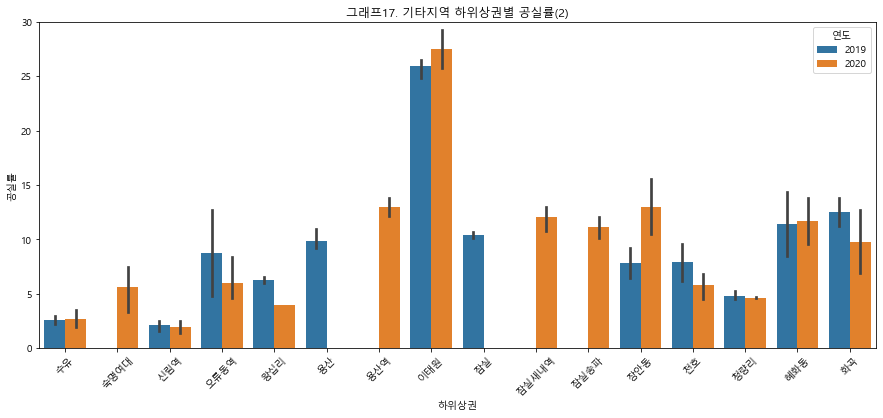

In [76]:
plt.figure(figsize=(15, 6))
g = sns.barplot(x='하위상권', y='공실률', hue='연도', data=etc[92:])
plt.xticks(rotation=45)
plt.title('그래프17. 기타지역 하위상권별 공실률(2)')
plt.ylim(0,30)
plt.show()

#그래프 해석
#이태원 공실률이 압도적이다. 수치상으로도 높다.

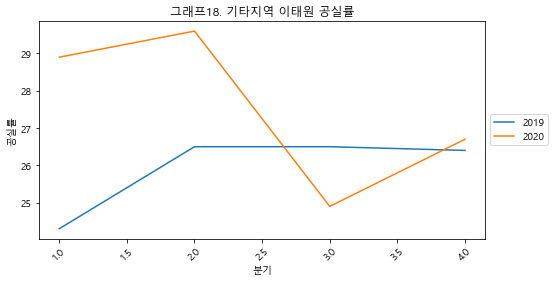

In [77]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='분기', y='공실률',hue='연도', data=etc[etc['하위상권']=='이태원'],
                palette=["C0", "C1"])
plt.xticks(rotation=45)
plt.title('그래프18. 기타지역 이태원 공실률')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#2020년 공실률은 감소했다가 다시 약간 상승했다.

## 3. 소득수익률

In [78]:
rent['소득수익률'].describe()
#소득수익률 수치자체는 작다. 최소값이 0.25 최대값이 1.16

count    400.00000
mean       0.77855
std        0.17564
min        0.28000
25%        0.65000
50%        0.79000
75%        0.90000
max        1.16000
Name: 소득수익률, dtype: float64

### (1) 도심지역

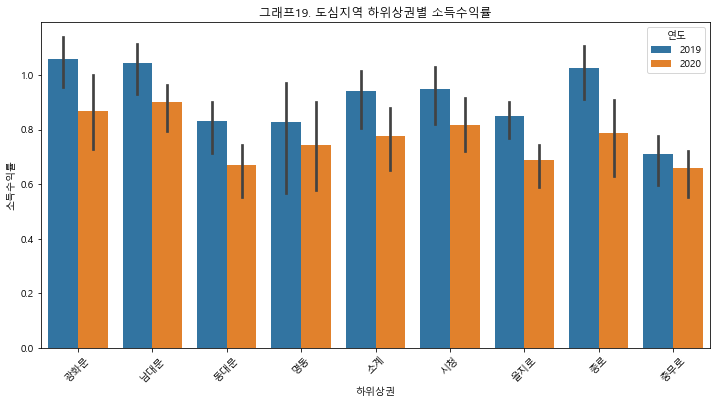

In [79]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='하위상권', y='소득수익률', hue='연도', data=dosim)
plt.xticks(rotation=45)
plt.title('그래프19. 도심지역 하위상권별 소득수익률')

plt.show()

#그래프 해석
#2019년엔 광화문, 2020년에는 남대문이 높다.

### (2) 강남지역

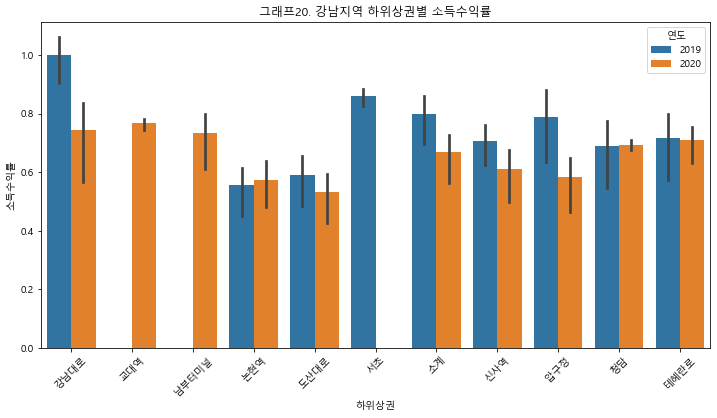

In [80]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='하위상권', y='소득수익률', hue='연도', data=gangnam)
plt.xticks(rotation=45)
plt.title('그래프20. 강남지역 하위상권별 소득수익률')

plt.show()
#그래프 해석
#2019년엔 강남대로, 2020년에는 교대역이 높다.

### (3)  영등포신촌지역

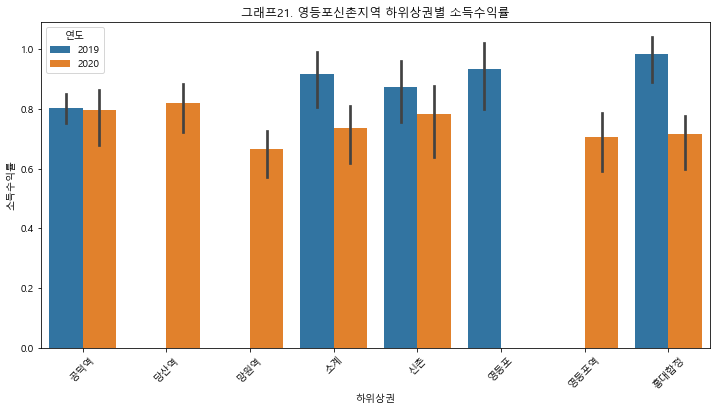

In [81]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='하위상권', y='소득수익률', hue='연도', data=young)
plt.xticks(rotation=45)
plt.title('그래프21. 영등포신촌지역 하위상권별 소득수익률')

plt.show()

#그래프 해석
#2019년에는 홍대합정, 2020년에는 당산역이 높다.

### (4) 기타지역

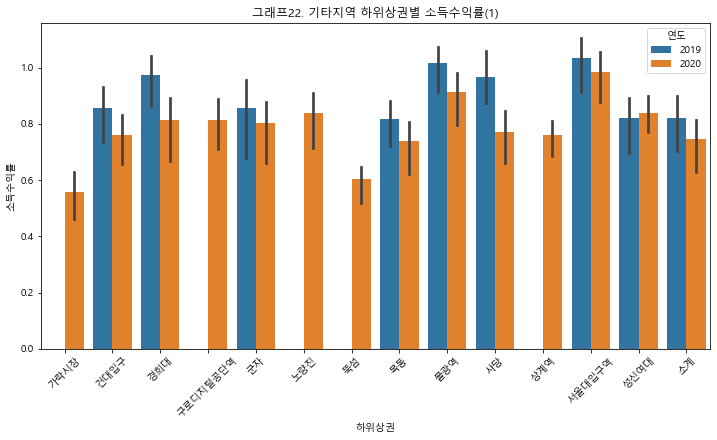

In [82]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='하위상권', y='소득수익률', hue='연도', data=etc[:92])
plt.xticks(rotation=45)
plt.title('그래프22. 기타지역 하위상권별 소득수익률(1)')

plt.show()

#그래프 해석
#2019년, 2020년 모두 서울대입구역이 높다.

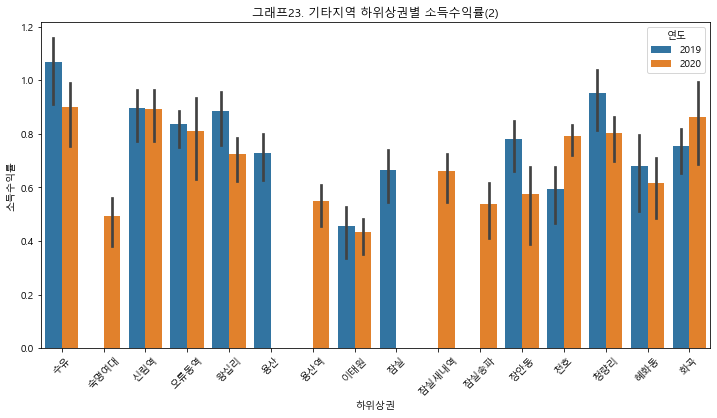

In [83]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='하위상권', y='소득수익률', hue='연도', data=etc[92:])
plt.xticks(rotation=45)
plt.title('그래프23. 기타지역 하위상권별 소득수익률(2)')

plt.show()

#그래프 해석
#2019년, 2020년 모두 수유가 높지만, 앞의 그래프와 합쳐 생각해보면 2020년에는 서울대입구역이 높다.

## 2020년 4분기만 보기

In [84]:
df20204 =rent[(rent['연도']==2020) & (rent['분기']==4)]

In [85]:
df20204

,광역상권,하위상권,임대료,공실률,소득수익률,연도,분기
345,서울,서울,54.2,8.8,0.77,2020,4
346,도심지역,소계,92.8,12.6,0.76,2020,4
347,도심지역,광화문,78.0,15.3,0.82,2020,4
348,도심지역,남대문,80.7,8.0,0.93,2020,4
349,도심지역,동대문,41.9,13.4,0.70,2020,4
350,도심지역,명동,271.7,22.3,0.60,2020,4
351,도심지역,시청,62.4,13.4,0.78,2020,4
352,도심지역,을지로,41.8,5.7,0.72,2020,4
353,도심지역,종로,73.1,10.7,0.79,2020,4
354,도심지역,충무로,45.3,6.2,0.70,2020,4


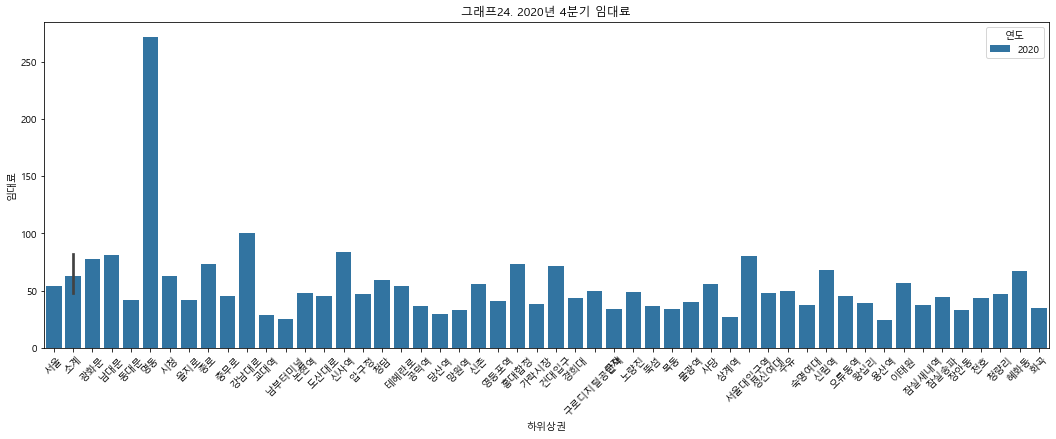

In [90]:
plt.figure(figsize=(18, 6))
g = sns.barplot(x='하위상권', y='임대료', hue='연도', data=df20204)
plt.xticks(rotation=45)
plt.title('그래프24. 2020년 4분기 임대료')
plt.show()

#그래프 해석
#명동이 임대료 1등이다. 의외로..

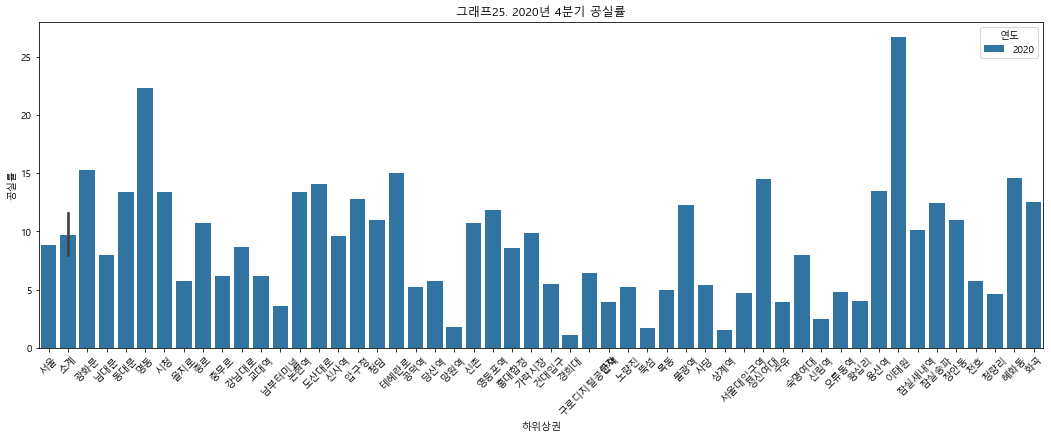

In [91]:
plt.figure(figsize=(18, 6))
g = sns.barplot(x='하위상권', y='공실률', hue='연도', data=df20204)
plt.xticks(rotation=45)
plt.title('그래프25. 2020년 4분기 공실률')
plt.show()

#그래프 해석
#이태원이 공실률 1등이다. 

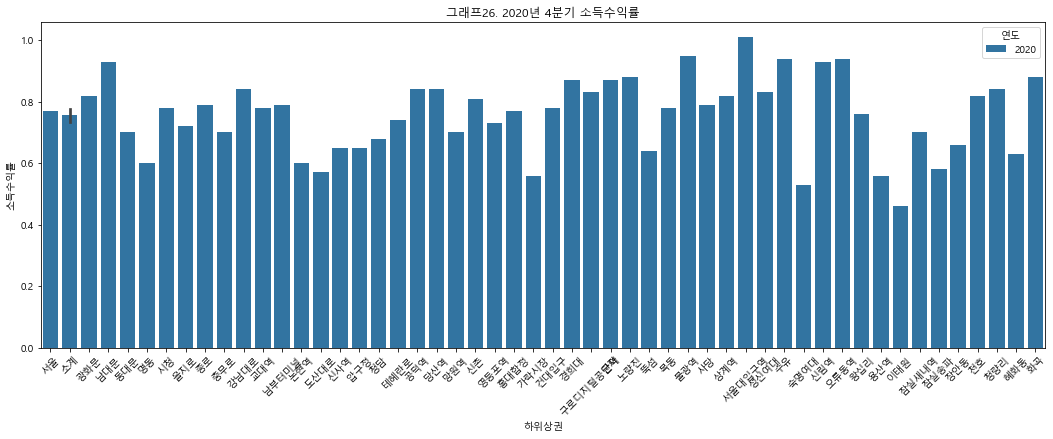

In [92]:
plt.figure(figsize=(18, 6))
g = sns.barplot(x='하위상권', y='소득수익률', hue='연도', data=df20204)
plt.xticks(rotation=45)
plt.title('그래프26. 2020년 4분기 소득수익률')
plt.show()

#그래프 해석
#서울대입구역이 소득수익률 1위이다.

## 결론(2020년 기준)

1. 임대료 top
    - 도심지역: 명동(약 270)
    - 강남지역 : 강남대로 (약 120)
    - 영등포신촌지역: 홍대합정 (약 70)
    - 기타지역: 서울대입구역 (약 80)
    - 2020년 4분기 기준: 명동(약 271)
 
 
2. 공실률 top
    - 도심지역: 명동(약 12.3, 최대 22.3)
    - 강남지역: 테헤란로(약 13)
    - 영등포신촌지역: 영등포역(약 14)
    - 기타지역: 불광역(약 13)
    - 2020년 4분기 기준: 이태원(약 26)
    

3. 소득수익률 top
    - 도심지역: 남대문(약 0.9)
    - 강남지역: 교대역(약 0.8)
    - 영등포신촌지역: 당산역(약 0.8)
    - 기타지역: 서울대입구역(약 1.0)
    - 2020년 4분기: 서울대입구역(약 1.01)

제외하면 좋은 지역: 명동이 포함된 중구, 이태원이 포함된 용산구